In [2]:
import hist
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants import boostHistHelpers as hh
from wremnants import histselections as sel
from wremnants import datasets2016
import lz4.frame
import pickle
hep.style.use(hep.style.ROOT)

Welcome to JupyROOT 6.27/01


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
with lz4.frame.open("../w_z_gen_dists.pkl.lz4") as f:
    boost = pickle.load(f)

In [5]:
def readForDataset(output, name, histname="nominal_gen"):
    if name not in output:
        raise ValueError(f"Sample {name} not in file")
    lumi = 1. if not "dataPostVFP" in output else output["dataPostVFP"]["lumi"]*1000
    info = output[name]
    scale = 1. if output[name]["dataset"]["is_data"] else \
                lumi*info["dataset"]["xsec"]/info["weight_sum"]
    print(scale)
    return info["output"][histname]*scale

In [6]:
def unrolledHist(h, obs=['prefsr_lepton_pt_gen', 'prefsr_lepton_eta_gen']):
    bins = np.multiply(*[len(a) for a in h.axes if a.name in obs])
    newh = hist.Hist(hist.axis.Regular(bins, 0, bins), storage=hist.storage.Weight())
    newh[...] = np.ravel(h.project(*obs))
    return newh

In [7]:
def makeVariationPlot(chns, variations, obs, xlabel, ylabel = 'Events/bin', 
                      rrange=[0.9, 1.1], scale=8.5e6):
    if type(variations) == str: variations = list(variations)
    width=3 if "unrolled" in obs else 1
    fig = plt.figure(figsize=(8*width,8))
    ax1 = fig.add_subplot(4, 1, (1, 3)) 
    ax2 = fig.add_subplot(4, 1, 4) 
    
    op = lambda x: x.project(obs) 
    if obs == "unrolled":
        op = unrolledHist

    hists  = [op(wgen[chn]['hist']['nominal']), *[op(wgen[chn]['hist']['vars'][x]) for x in variations]]
    colors = [wgen[chn]['color']['nominal'], *wgen[chn]['color']['vars']]
    labels = [wgen[chn]['label']['nominal'], *wgen[chn]['label']['vars']]
    
    hep.histplot(
        hists,
        histtype = "step",
        color = colors,
        label = labels,
        ax = ax1
    )
    

    hep.histplot(
        [hh.divideHists(x, hists[0]) for x in hists],
        histtype="step",
        yerr=False,
        color=colors,
        ax=ax2
    )
        
    ax1.set_xlabel("")
    ax2.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_xticklabels([])
    xrange = [hists[0].axes[0].edges[0], hists[0].axes[0].edges[len(hists[0].axes[0])-1]]
    ax1.set_xlim(xrange)
    ax2.set_xlim(xrange)
    ax2.set_ylabel("variation/nominal", fontsize=22)
    ax2.set_ylim(rrange)
    ax1.set_ylim([0, scale])
    ax1.legend(prop={'size' : 20*(0.7 if width == 1 else 1.3)}, loc='upper right')

In [8]:
# comparing the same distribution in different sets of samples
# to figure out the effect of certain bug fixes

def makeComparisonPlot(chns, obs, xlabel, ylabel = 'Events/bin',
                       rrange=[0.9, 1.1], scale=8.5e6):
    if type(chns) == str: chns = list(chns)
    width=3 if "unrolled" in obs else 1
    fig = plt.figure(figsize=(8*width,8))
    ax1 = fig.add_subplot(4, 1, (1, 3)) 
    ax2 = fig.add_subplot(4, 1, 4) 
    
    op = lambda x: x.project(obs) 
    if obs == "unrolled":
        op = unrolledHist

    hists  = [op(wgen[chn]['hist']['nominal']) for chn in chns]
    colors = [wgen[chn]['color']['nominal'] for chn in chns]
    labels = [wgen[chn]['label']['nominal'] for chn in chns]
    
    hep.histplot(
        hists,
        histtype = "step",
        color = colors,
        label = labels,
        ax = ax1,
        binwnorm=True
    )
    

    hep.histplot(
        [hh.divideHists(x, hists[0]) for x in hists],
        histtype="step",
        yerr=False,
        color=colors,
        ax=ax2
    )
        
    ax1.set_xlabel("")
    ax2.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_xticklabels([])
    xrange = [hists[0].axes[0].edges[0], hists[0].axes[0].edges[len(hists[0].axes[0])-1]]
    ax1.set_xlim(xrange)
    ax2.set_xlim(xrange)
    ax2.set_ylabel("variation/nominal", fontsize=22)
    ax2.set_ylim(rrange)
    ax1.set_ylim([0, scale])
    ax1.legend(prop={'size' : 20*(0.7 if width == 1 else 1.3)}, loc='upper right')

In [9]:
boost['ZmumuPostVFP_bugfix']['output']['nominal_gen']

Hist(
  Regular(12, 60, 120, name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Regular(48, -2.4, 2.4, name='prefsr_lepton_eta_gen', label='prefsr_lepton_eta_gen'),
  Regular(29, 26, 55, name='prefsr_lepton_pt_gen', label='prefsr_lepton_pt_gen'),
  storage=Weight()) # Sum: WeightedSum(value=677412, variance=772384) (WeightedSum(value=1.53153e+06, variance=1.8096e+06) with flow)

In [10]:
boost['ZmumuPostVFP']['output']['nominal_gen']

Hist(
  Regular(12, 60, 120, name='massVgen', label='massVgen'),
  Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
  Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
  Integer(0, 1, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Regular(48, -2.4, 2.4, name='prefsr_lepton_eta_gen', label='prefsr_lepton_eta_gen'),
  Regular(29, 26, 55, name='prefsr_lepton_pt_gen', label='prefsr_lepton_pt_gen'),
  storage=Weight()) # Sum: WeightedSum(value=3.2371e+07, variance=3.72127e+07) (WeightedSum(value=7.32803e+07, variance=8.73038e+07) with flow)

In [11]:
boost['WplusmunuPostVFP']['output']['nominal_gen'].axes

(Variable([0, inf], name='massVgen', label='massVgen'),
 Variable([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 10], name='absYVgen', label='absYVgen'),
 Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'),
 Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
 Regular(48, -2.4, 2.4, name='prefsr_lepton_eta_gen', label='prefsr_lepton_eta_gen'),
 Regular(29, 26, 55, name='prefsr_lepton_pt_gen', label='prefsr_lepton_pt_gen'))

In [12]:
boost.keys()

dict_keys(['dataPostVFP', 'WplusmunuPostVFP', 'WminusmunuPostVFP', 'WplusmunuPostVFP_bugfix', 'WminusmunuPostVFP_bugfix', 'WplustaunuPostVFP', 'WminustaunuPostVFP', 'ZmumuPostVFP', 'ZmumuPostVFP_bugfix', 'ZtautauPostVFP'])

In [13]:
datagroups = {
    "Data" : dict(
        members = ["dataPostVFP"],
        color = "black",
        label = "Data",
        hist = {},
    ),
    "Fake" : dict(
        members = list(boost.keys()),
        label = "Nonprompt",
        color = "grey",
        hist = {},
    ),
    "Zmumu" : dict(
        members = ["ZmumuPostVFP"],
        label = r"Z$\to\mu\mu$",
        color = "lightblue",
        hist = {},
    ),   
    "Wtau" : dict(
        members = ["WminustaunuPostVFP", "WplustaunuPostVFP"],
        label = r"W$^{\pm}\to\tau\nu$",
        color = "orange",
        hist = {},
    ),
    "W" : dict(
        members = ["WminusmunuPostVFP", "WplusmunuPostVFP"],
        label = r"W$^{\pm}\to\mu\nu$",
        color = "darkred",
        hist = {},
    ),
    "Ztt" : dict(
        members = ["ZtautauPostVFP"],
        label = r"Z$\to\tau\tau$",
        color = "darkblue",
        hist = {},
    ), 
    "Top" : dict(
        members = ["TTSemileptonicPostVFP", "TTLeptonicPostVFP"],
        label = "Top",
        color = "green",
        hist = {},
    ), 
    "Diboson" : dict(
        members = ["WWPostVFP"],
        label = "Diboson",
        color = "pink",
        hist = {},
    ), 
}


variations = []
variation_labels = []
variation_colors = []

wgen = {
    'WminusmunuPostVFP': dict(
        label = {
            'nominal': r'$W^{-}$ nominal_gen',
            'vars': [r'$W^{-}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'black',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'WminusmunuPostVFP_bugfix': dict(
        label = {
            'nominal': r'$W^{-}$ nominal_gen bugfix',
            'vars': [r'$W^{-}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'red',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'WplusmunuPostVFP': dict(
        label = {
            'nominal': r'$W^{+}$ nominal_gen',
            'vars': [r'$W^{+}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'black',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'WplusmunuPostVFP_bugfix': dict(
        label = {
            'nominal': r'$W^{+}$ nominal_gen bugfix',
            'vars': [r'$W^{+}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'red',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'ZmumuPostVFP': dict(
        label = {
            'nominal': r'$Z \rightarrow \mu\mu$ nominal_gen',
            'vars': [r'$Z \rightarrow \mu\mu$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'black',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'ZmumuPostVFP_bugfix': dict(
        label = {
            'nominal': r'$Z \rightarrow \mu\mu$ nominal_gen bugfix',
            'vars': [r'$Z \rightarrow \mu\mu$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'red',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    )
}


for chn, v in wgen.items():
    try:
        h_nominal = readForDataset(boost, chn)
    except ValueError as e:
        print(e)
        continue
    v['hist']['nominal'] = h_nominal
#    v['hist']['nominal'] = sel.signalHistWmass(v['hist']['nominal'])
    
    for var in variations:
        try:
            h_var = readForDataset(boost, chn, histname = var)
        except ValueError as e:
            print(e)
            continue
        if 'pdf' in var:
            v['hist']['vars'][var] = h_var[...,1] #get the first var set after nominal
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'qcd' in var:
            v['hist']['vars'][var] = h_var[...,0]
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'muonScale' in var:
            v['hist']['vars'][var] = h_var[...,0,0] #[down, 2nd_eta_bin]
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'massWeight' in var:
            v['hist']['vars'][var] = h_var[...,20] #for 100 MeV mass shift
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])           

0.7361441792334525
11.975468287301211
0.560186807337461
16.323796100762156
0.44873106460075224
21.470738409964923


In [14]:
#data

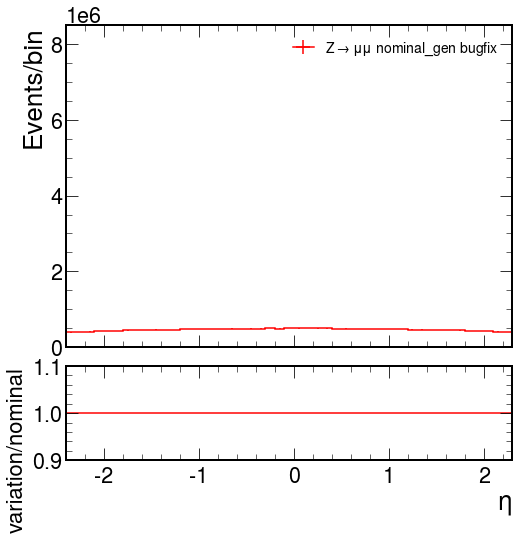

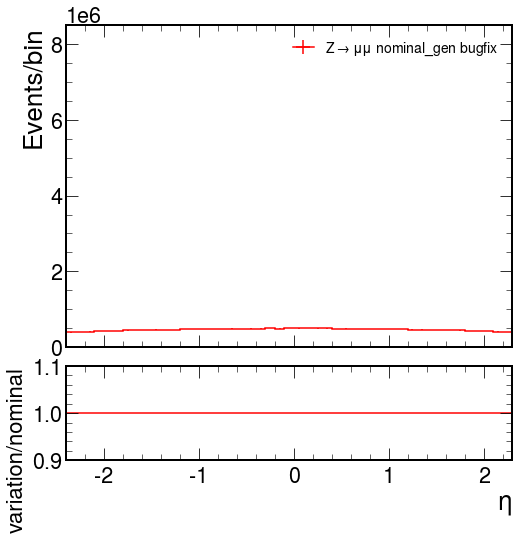

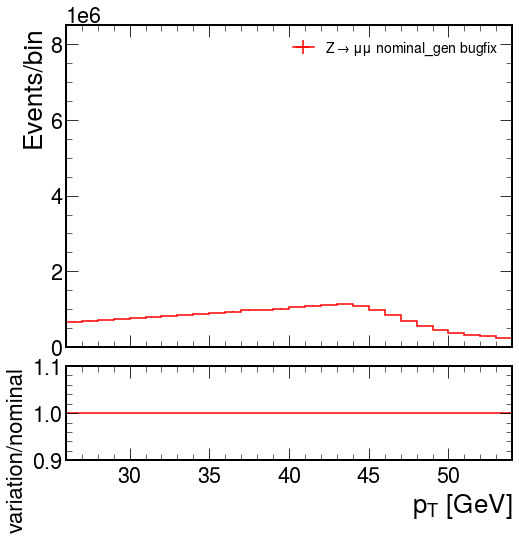

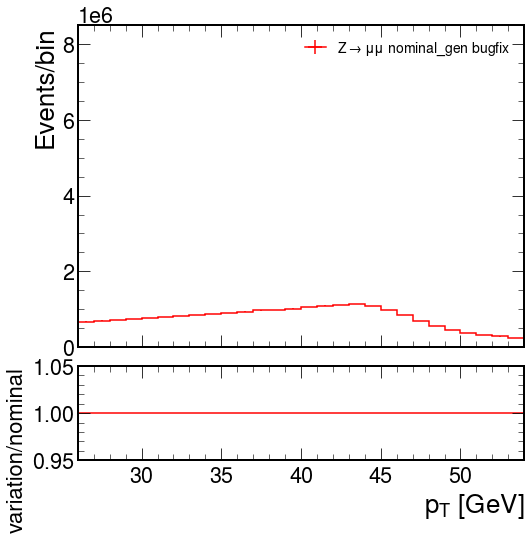

In [15]:
makeVariationPlot('WminusmunuPostVFP', variations, "prefsr_lepton_eta_gen", xlabel=r"$\eta$", rrange=[0.9, 1.1])
makeVariationPlot('WplusmunuPostVFP', variations, "prefsr_lepton_eta_gen", xlabel=r"$\eta$", rrange=[0.9, 1.1])
makeVariationPlot('WminusmunuPostVFP', variations, "prefsr_lepton_pt_gen", xlabel=r"p$_{T}$ [GeV]", rrange=[0.9, 1.1])
makeVariationPlot('WplusmunuPostVFP', variations, "prefsr_lepton_pt_gen", xlabel=r"p$_{T}$ [GeV]", rrange=[0.95, 1.05])


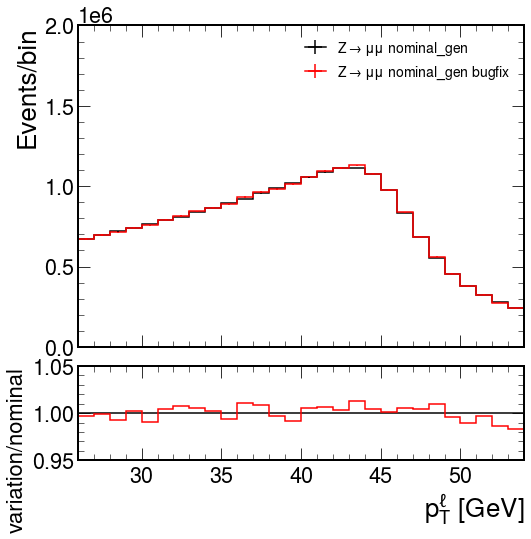

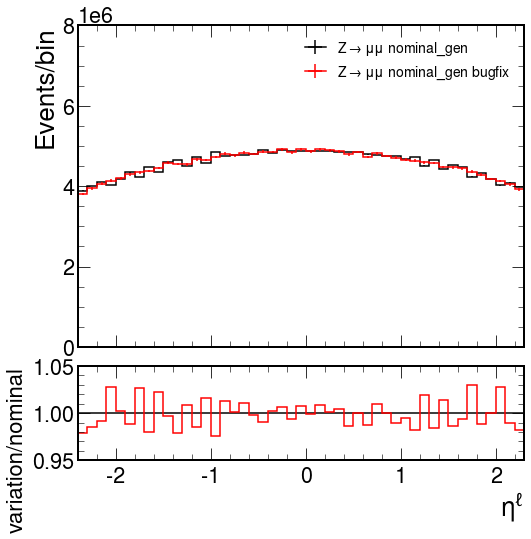

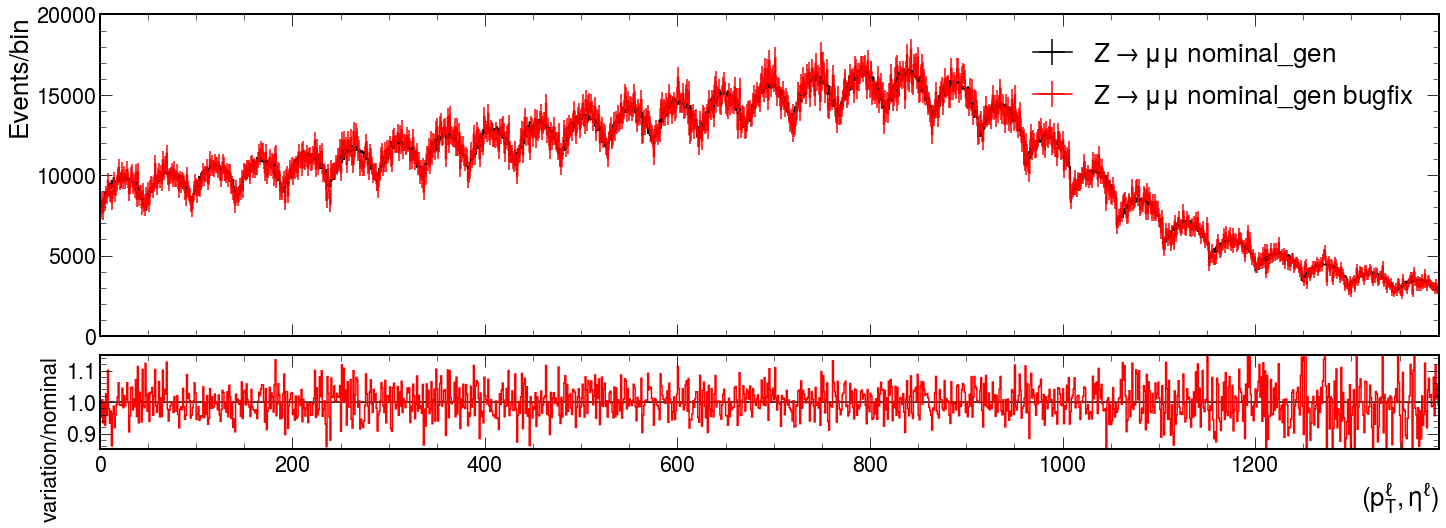

In [16]:
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "prefsr_lepton_pt_gen", xlabel=r"p$_{T}^{\ell}$ [GeV]" , rrange=[0.95, 1.05], scale=2e6)
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "prefsr_lepton_eta_gen", xlabel=r"$\eta^{\ell}$" , rrange=[0.95, 1.05], scale=8e6)
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "unrolled", xlabel=r"$(p_{T}^{\ell},\eta^{\ell})$" , rrange=[0.85, 1.15], scale=2e4)

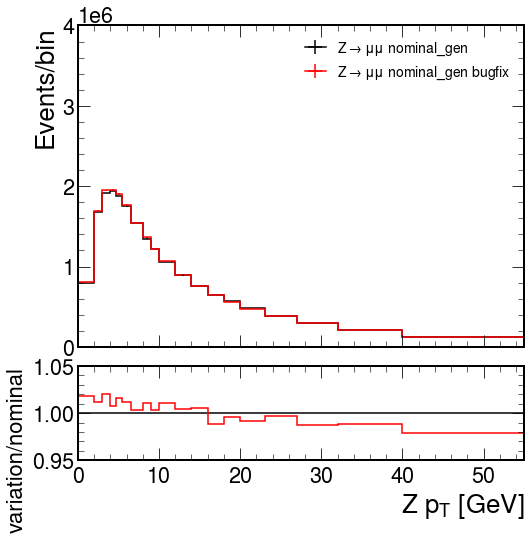

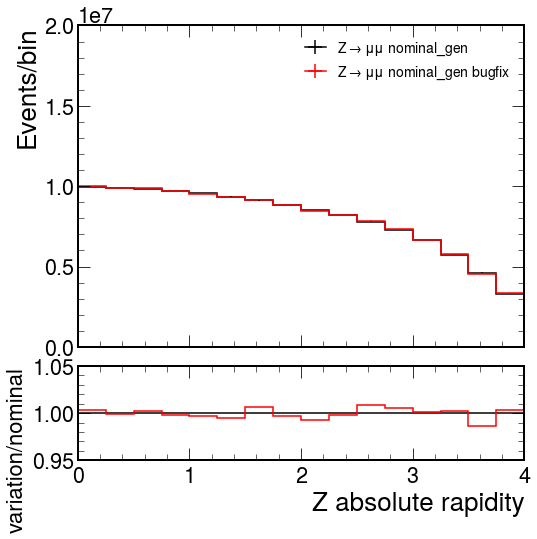

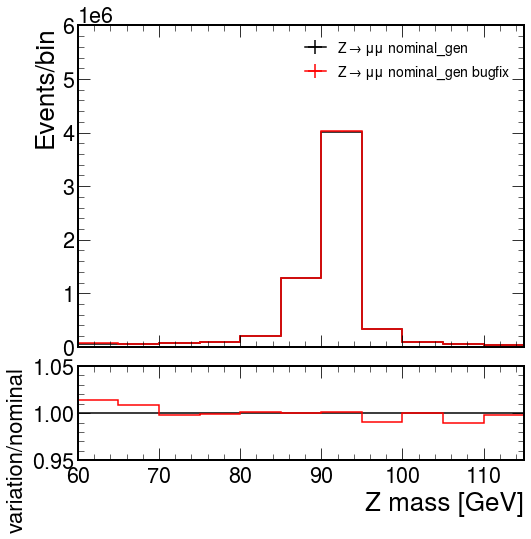

In [17]:
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "ptVgen", xlabel=r"Z p$_{T}$ [GeV]" , rrange=[0.95, 1.05], scale=4e6)
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "absYVgen", xlabel=r"Z absolute rapidity", rrange=[0.95, 1.05], scale=2e7)
makeComparisonPlot(['ZmumuPostVFP', 'ZmumuPostVFP_bugfix'], "massVgen", xlabel=r"Z mass [GeV]" , rrange=[0.95, 1.05], scale=6e6)

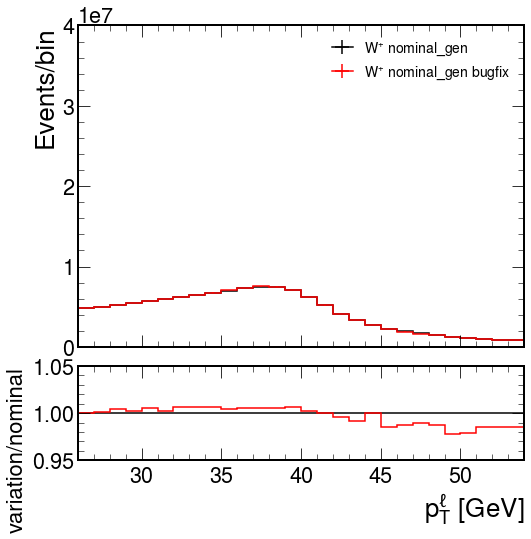

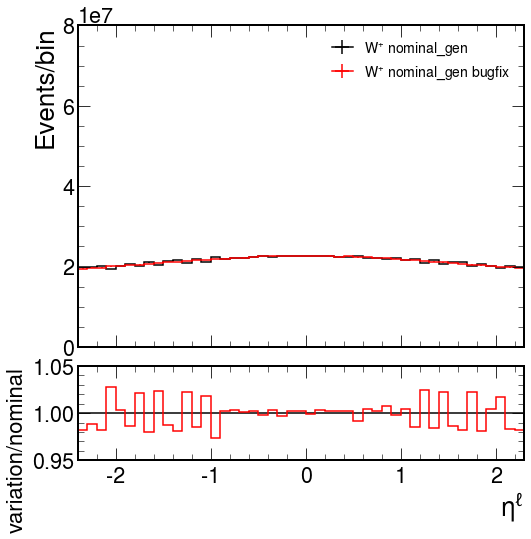

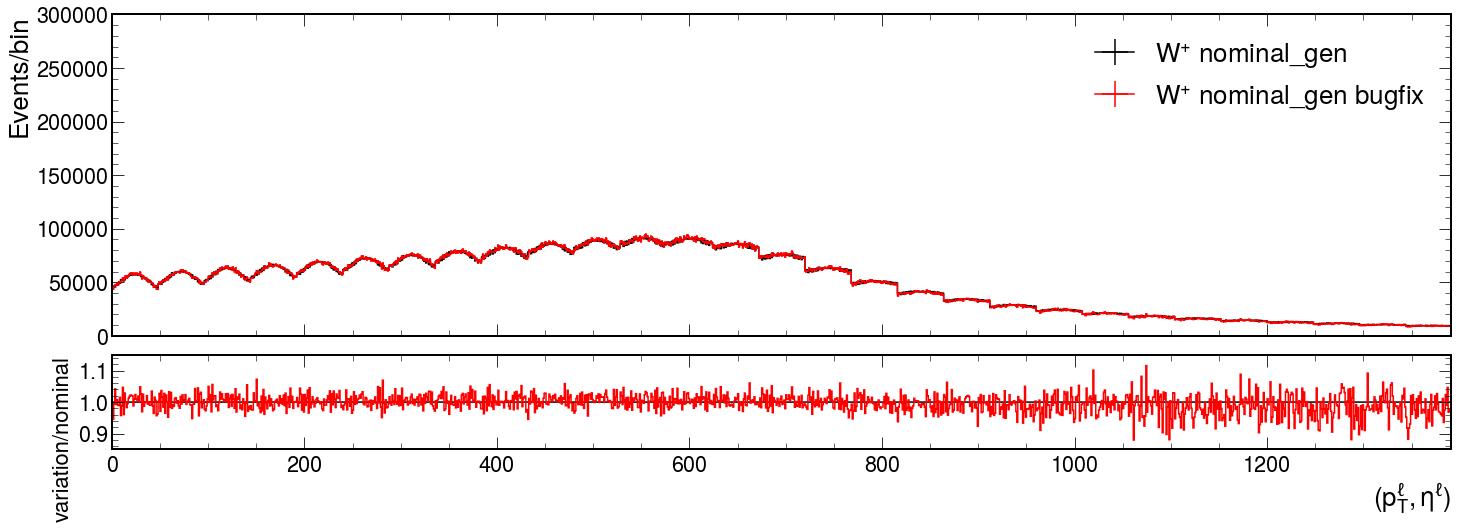

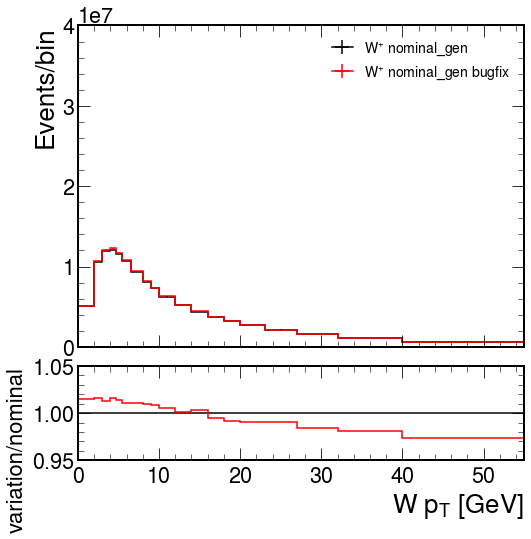

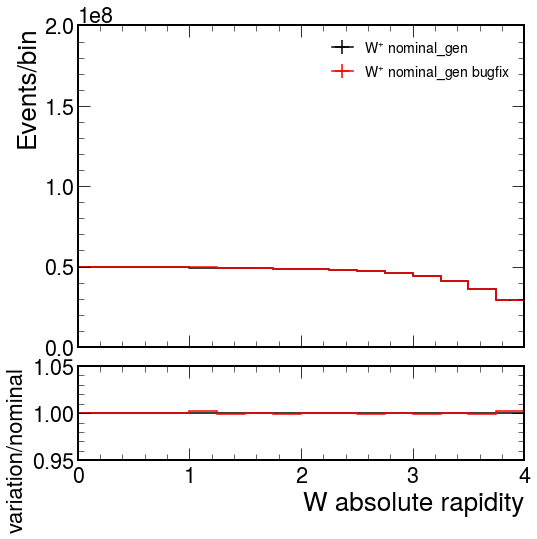

In [18]:
makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "prefsr_lepton_pt_gen", xlabel=r"p$_{T}^{\ell}$ [GeV]" , rrange=[0.95, 1.05], scale=4e7)
makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "prefsr_lepton_eta_gen", xlabel=r"$\eta^{\ell}$" , rrange=[0.95, 1.05], scale=8e7)
makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "unrolled", xlabel=r"$(p_{T}^{\ell},\eta^{\ell})$" , rrange=[0.85, 1.15], scale=3e5)
makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "ptVgen", xlabel=r"W p$_{T}$ [GeV]" , rrange=[0.95, 1.05], scale=4e7)
makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "absYVgen", xlabel=r"W absolute rapidity", rrange=[0.95, 1.05], scale=2e8)
#makeComparisonPlot(['WplusmunuPostVFP', 'WplusmunuPostVFP_bugfix'], "massVgen", xlabel=r"Z mass [GeV]" , rrange=[0.95, 1.05], scale=6e6)

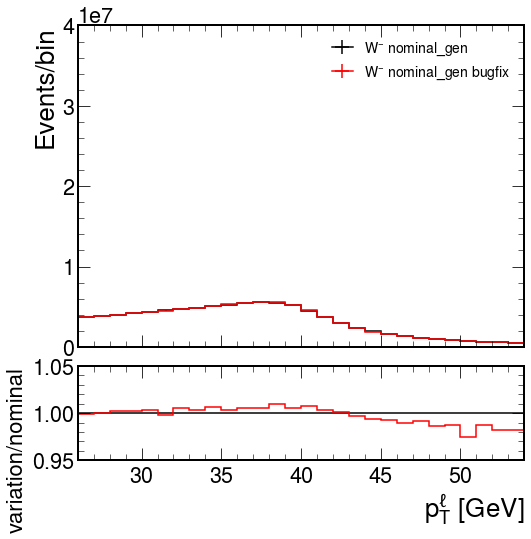

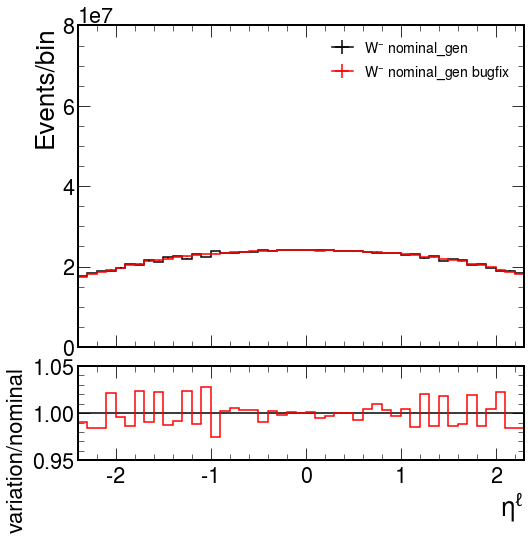

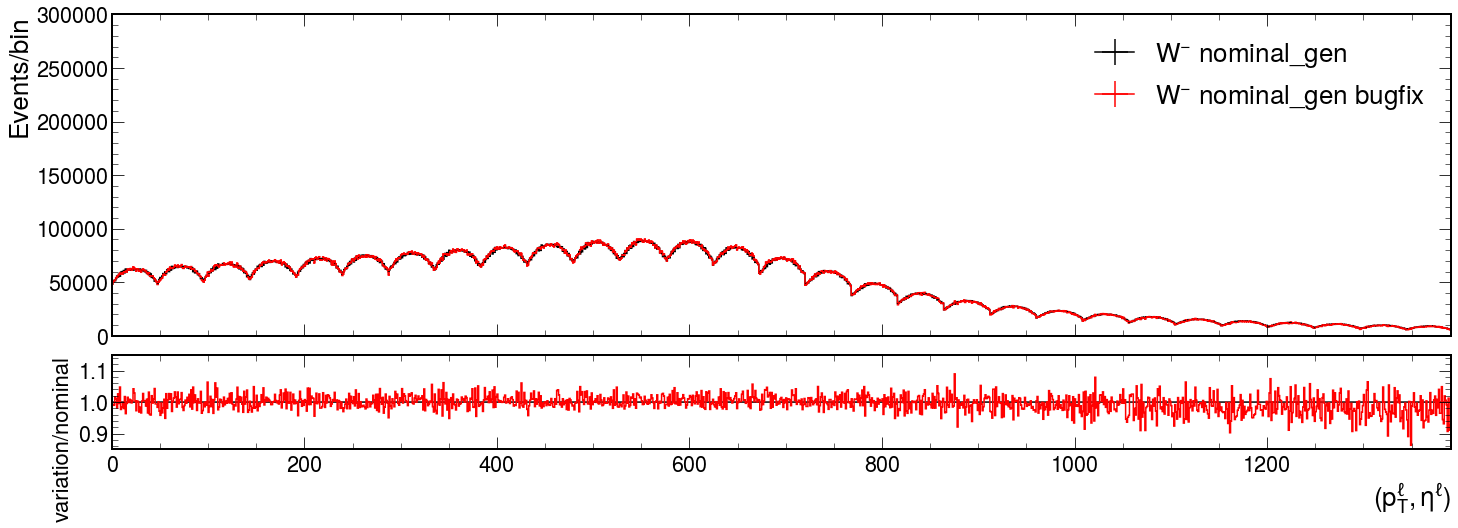

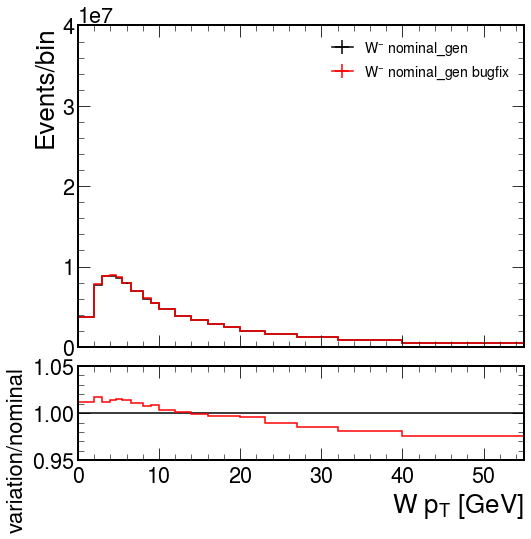

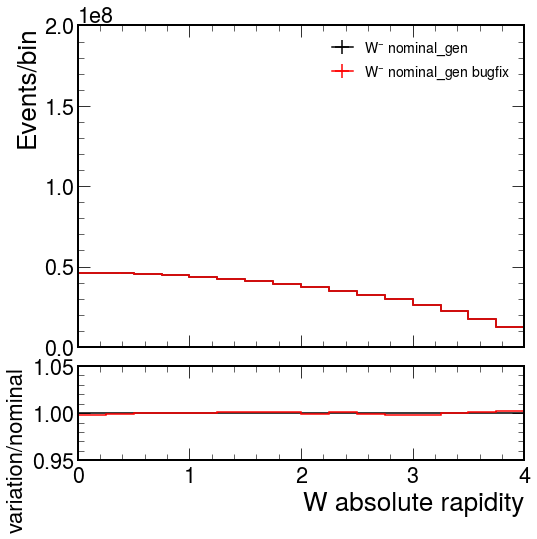

In [19]:
makeComparisonPlot(['WminusmunuPostVFP', 'WminusmunuPostVFP_bugfix'], "prefsr_lepton_pt_gen", xlabel=r"p$_{T}^{\ell}$ [GeV]" , rrange=[0.95, 1.05], scale=4e7)
makeComparisonPlot(['WminusmunuPostVFP', 'WminusmunuPostVFP_bugfix'], "prefsr_lepton_eta_gen", xlabel=r"$\eta^{\ell}$" , rrange=[0.95, 1.05], scale=8e7)
makeComparisonPlot(['WminusmunuPostVFP', 'WminusmunuPostVFP_bugfix'], "unrolled", xlabel=r"$(p_{T}^{\ell},\eta^{\ell})$" , rrange=[0.85, 1.15], scale=3e5)
makeComparisonPlot(['WminusmunuPostVFP', 'WminusmunuPostVFP_bugfix'], "ptVgen", xlabel=r"W p$_{T}$ [GeV]" , rrange=[0.95, 1.05], scale=4e7)
makeComparisonPlot(['WminusmunuPostVFP', 'WminusmunuPostVFP_bugfix'], "absYVgen", xlabel=r"W absolute rapidity", rrange=[0.95, 1.05], scale=2e8)

In [20]:
with lz4.frame.open("../w_coeffs.pkl.lz4") as f:
    ang_lz4 = pickle.load(f)
    
def readForAngularCoeff(output, name, histname="nominal_gen"):
    if name not in output:
        raise ValueError(f"Sample {name} not in file")
    lumi = 1. if not "dataPostVFP" in output else output["dataPostVFP"]["lumi"]*1000
    info = output[name]
    scale = 1. if output[name]["dataset"]["is_data"] else \
                lumi*info["dataset"]["xsec"]/info["weight_sum"]
    print(scale)
    return info["output"][histname]*scale

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f4319792020>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f43197933a0>, text=[])

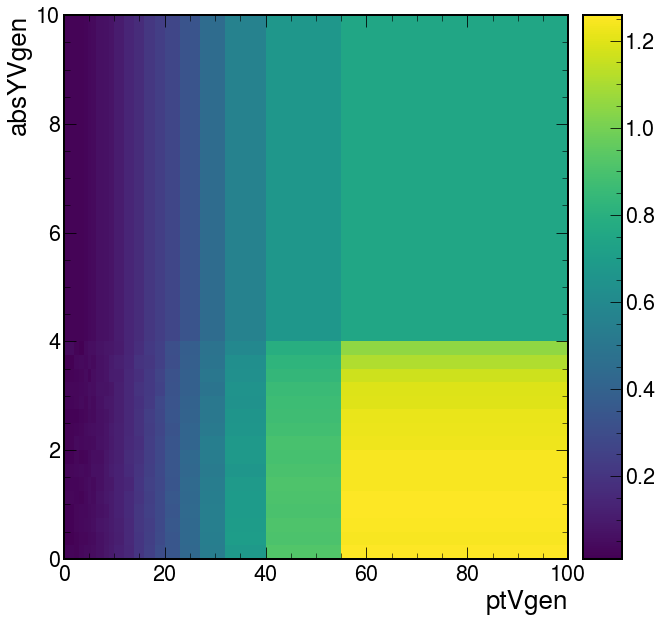

In [25]:
#ang_lz4.keys()
ang_lz4[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 1}].project("ptVgen", "absYVgen").plot()


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f431b66c8b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f431b697880>, text=[])

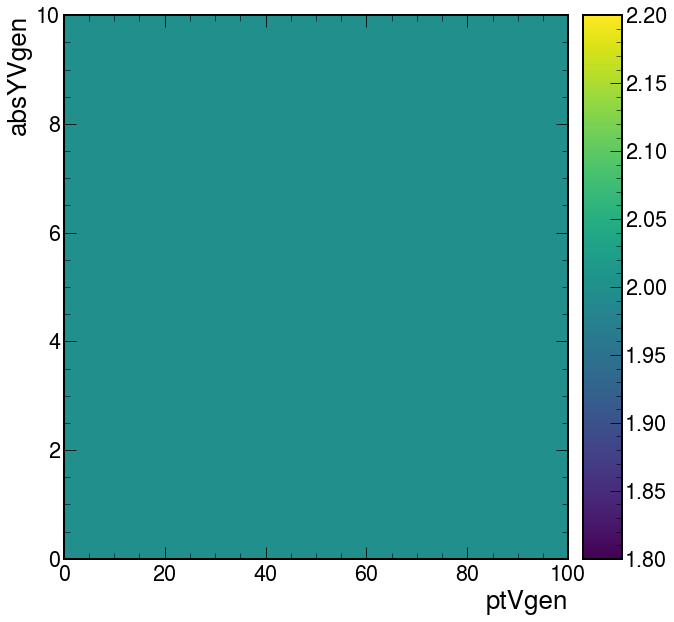

In [24]:
ang_lz4[{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : 0}].project("ptVgen", "absYVgen").plot()
